In [8]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

cv_image_original = cv2.imread('../damn.jpg')

top_x = 62
top_y = 4

bottom_x = 150
bottom_y = 120

cv_image_original = cv2.GaussianBlur(cv_image_original, (5, 5), 0)

pts_src = np.array([[424 - top_x, 240 - top_y], [424 + top_x, 240 - top_y], [424 + bottom_x, 240 + bottom_y], [424 - bottom_x, 240 + bottom_y]])

pts_dst = np.array([[148, 0], [600, 0], [600, 480], [148, 480]])

h, status = cv2.findHomography(pts_src, pts_dst)

cv_image_homography = cv2.warpPerspective(cv_image_original, h, (848, 480))

In [9]:
img = cv_image_homography.copy()

h, w, _ = cv_image_homography.shape

heights = [100, h // 2, h - 100]

dot_mas = []

for z in range(len(heights)):
    row = cv_image_homography[heights[z], :]

    threshold_yellow = [0, 200, 200]    # INVERT!!! BGR
    threshold_white = [230, 230, 230]

    thresholds = [threshold_yellow, threshold_white]

    for threshold in thresholds:
        start = None
        end = None
        for i in range(len(row)):
            if (row[i] > threshold).all() and start is None:
                start = i
            elif (row[i] < threshold).any() and start is not None:
                end = i
                break

        if start is not None and end is not None:
            center_x = (start + end) // 2
            dot_mas.append([center_x, heights[len(heights) - z - 1]])
            print(f"Центр вертикальной полосы на высоте {heights[z]}: {center_x}")
        else:
            dot_mas.append([None, heights[len(heights) - z - 1]])
            print("Полоса не найдена")

Центр вертикальной полосы на высоте 100: 52
Центр вертикальной полосы на высоте 100: 629
Центр вертикальной полосы на высоте 240: 40
Центр вертикальной полосы на высоте 240: 631
Центр вертикальной полосы на высоте 380: 42
Центр вертикальной полосы на высоте 380: 630


In [14]:
cv_image_dots = cv_image_homography.copy()
for point in dot_mas:
    x, y = point
    if x != None:
        cv2.circle(cv_image_dots, (x, y), radius=5, color=(255, 255, 0), thickness=-1)

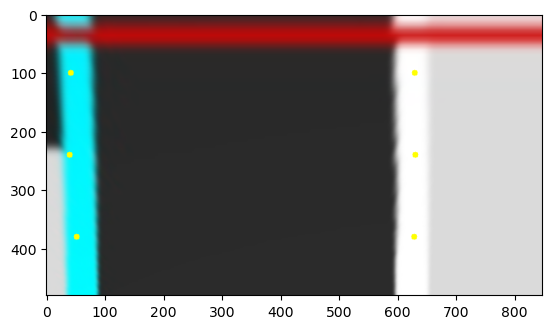

In [17]:
plt.imshow(np.asarray(cv_image_dots))
plt.show()

In [25]:
def find_center_of_mass_trapezoid(dot_mas):
    x1, y1 = dot_mas[0]
    x2, y2 = dot_mas[1]
    x3, y3 = dot_mas[3]
    x4, y4 = dot_mas[2]

    # Длины оснований
    L = abs(x2 - x1)
    l = abs(x4 - x3)
    
    # Высота трапеции
    h = abs(y2 - y3)
    
    # Координата x центра массы
    xc = ((L + 2 * l) * x1 + (2 * L + l) * x3) / (3 * (L + l))
    
    # Координата y центра массы
    yc = h * (y1 + y3) / 2
        
    return xc, yc

xc1, yc1 = find_center_of_mass_trapezoid(dot_mas[0:4])
xc2, yc2 = find_center_of_mass_trapezoid(dot_mas[2:6])

d_BC = np.sqrt((xc1 - xc2)**2 + (yc2 - yc2)**2)
d_AC = np.sqrt((xc1 - xc1)**2 + (yc2 - yc1)**2)

near = d_AC
oppos = d_BC

angle = np.arctan(oppos/near)
angle_degrees = np.degrees(angle)

print(f"Острый угол равен: {angle_degrees} градусов.")
print(f"Острый угол равен: {angle} radians.")

Острый угол равен: 0.014888453764873128 градусов.
Острый угол равен: 0.00025985253872798174 radians.
